# <center>Aston University <br/><br/> CS3IVP: Image and Video Processing <br/><br/> Lab 06: Image Sharpening</center>

## Goals
The goals of this lab are:
1. To continue practising image filtering.
2. To use image filtering to sharpen greyscale images.


## Instructions
No submission is required for this laboratory.


## Task 6.1 Previous laboratories
Make sure that you have completed all previous laboratories and that you have no doubts after the lab. If you have any, please ask, we are here to help you.

First of all, **run the cell below**. It loads modules that might be of interest for this laboratory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
import scipy.ndimage

## Task 6.2
Using the cell below, write a function `scale_matrix` which takes a greyscale image (or a 2D array in general) as input, **scales** it so that it would be displayable as an 8-bit greyscale image and returns the result. 

**Hint 1**: We need to calculate the minimum and maximum values in some matrix as part of this process. NumPy has functions `np.min()` and `np.max()` which will do this automatically.

**Hint 2**: We should not assume that the input is an array of `np.uint8` or `float` cells. What should we do to make sure that we can perfom the operations required? What should we do to ensure that the output is of the type we need for unsigned integers with $c_{max}=255$?

Use your function on the array defined below and display the result of calling the function after filtering it with a 3x3 box filter.

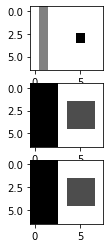

In [52]:
input_array = np.array([[100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100,-100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100]])

# Hint for the box filter...
box = np.array([[1., 1., 1],
                [1., 1., 1],
                [1., 1., 1]])/9.

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def scale_matrix(m):
    mUint8 = m.astype(np.uint8)
    cMax = 255
    minP = np.min(mUint8)
    maxP = np.max(mUint8)
    diffP = maxP - minP
    scaled = (mUint8 - minP) / diffP * cMax
    return scaled.astype(np.uint8)
    
figs, axes = plt.subplots(3)
axes[0].imshow(input_array, cmap='gray');
axes[1].imshow(scipy.ndimage.uniform_filter(input_array, size=3), cmap='gray');
axes[2].imshow(scale_matrix(scipy.ndimage.uniform_filter(input_array, size=3)), cmap='gray');

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 6.3
Write a function `display_laplacian_result` which takes a greyscale image matrix as input and displays the scaled Laplacian (calculated as described in the Image Sharpening lecture slides).
Test your function using an image of your choosing read from file.

**Hint 1:** You will need to make use of the function scale_matrix from Task 6.2.

**Hint 2:** Make sure that the image that you correlate is made of floats temporarily so that the output is also float. Why is that necessary?

For good style, your function should be modular (*i.e.*, it should split its task into suitable sub-tasks, only allowing each sub-task access to the information that it needs).

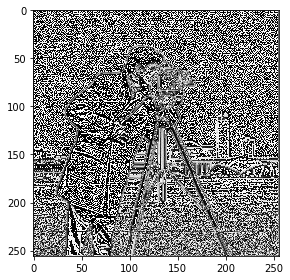

In [53]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def display_laplacian_result(image):
    laplacianFilter = np.array([[ 0,  1,  0],
                                [ 1, -4,  1],
                                [ 0,  1,  0]]).astype(float)
    laplacian = scipy.ndimage.correlate(image.astype(float), laplacianFilter, mode='constant')
    scaledLaplacian = scale_matrix(laplacian)
    imshow(scaledLaplacian)


display_laplacian_result(imread('camera.bmp'))

# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## End of lab 06